# Objective

*   Zoom Electric (ZE) is an electric automotive venture of a leading automotive manufacturer ZOOM MOTORS India Private Limited.
*   ZE has introduced a new scooter variant, Sprint in the 2 wheeler EV scooter segment.
*   Initially Sprint Scooters' sales numbers were quite impressive in the first
few years but last year(2019) it decreased unexpectedly.
*   **So as a Data analyst, goal is to find ways to improve the sales and also try to find the reason for sales drop**













### **Database Schema**

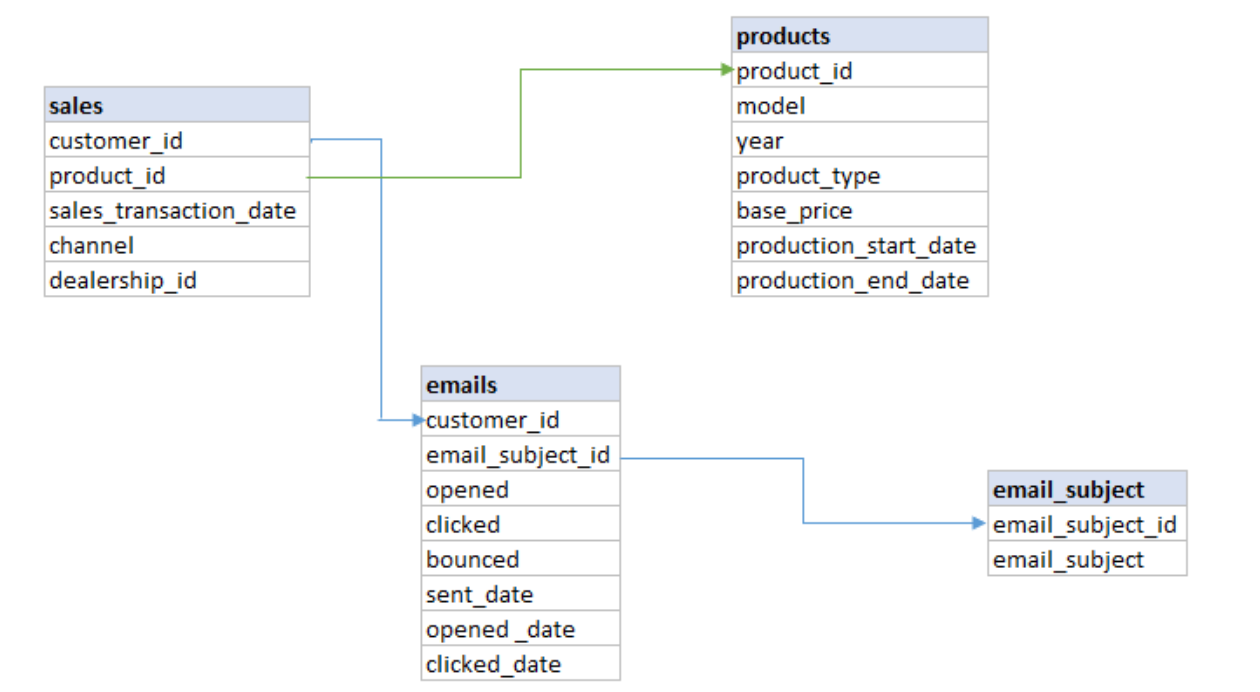

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Converting csv files into database

In [2]:
"""
# Connect to SQL Server
conn=sqlite3.connect('/content/drive/MyDrive/zoom ev sales data/ev_sales.db')
cursor=conn.cursor()

# Create Table
cursor.execute('''
    CREATE TABLE if not exists email_subject(
			email_subject_id varchar primary key,
			email_subject varchar
			);''')
cursor.execute('''
    CREATE TABLE if not exists emails (
			email_id int primary key,
			customer_id int,
      opened boolean,
      clicked	boolean,
			bounced	boolean,
      sent_date timestamp,
      opened_date timestamp,
      clicked_date timestamp,
      email_subject_id varchar,
      foreign key(customer_id) references sales(customer_id)
			);''')
cursor.execute('''
		CREATE TABLE if not exists products (
			product_id int primary key,
      model varchar,
      year int,
      product_type varchar,
      base_price float,
			production_start_date timestamp,
      production_end_date timestamp
			);''')
cursor.execute('''
    CREATE TABLE if not exists sales (
			customer_id int,
			product_id int,
			sales_transaction_date timestamp,
      channel varchar,
      dealership_id int,
      foreign key (product_id) references products(product_id)
			);''')


# Import CSV
data = pd.read_csv (r'/content/drive/MyDrive/zoom ev sales data/email_subject.csv')
df = pd.DataFrame(data)

# Insert DataFrame to Table
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO email_subject (email_subject_id,	email_subject)
                VALUES (?,?)
                ''',
                (row.email_subject_id,row.email_subject)
                )

data = pd.read_csv (r'/content/drive/MyDrive/zoom ev sales data/emails.csv')
df = pd.DataFrame(data)

# Insert DataFrame to Table
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO emails (email_id,	customer_id,	opened,	clicked,	bounced,	sent_date,	opened_date,	clicked_date,	email_subject_id)
                VALUES (?,?,?,?,?,?,?,?,?)
                ''',
                (row.email_id,
                 row.customer_id,
                 row.opened,
                 row.clicked,
                 row.bounced,
                 row.sent_date,
                 row.opened_date,
                 row.clicked_date,
                 row.email_subject_id)
                )

data = pd.read_csv (r'/content/drive/MyDrive/zoom ev sales data/products.csv')
df = pd.DataFrame(data)

# Insert DataFrame to Table
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO products (product_id,	model,	year,	product_type,	base_price,	production_start_date,	production_end_date)
                VALUES (?,?,?,?,?,?,?)
                ''',
                (row.product_id,
                 row.model,
                 row.year,
                 row.product_type,
                 row.base_price,
                 row.production_start_date,
                 row.production_end_date)
                )
data = pd.read_csv (r'/content/drive/MyDrive/zoom ev sales data/sales.csv')
df = pd.DataFrame(data)

# Insert DataFrame to Table
for row in df.itertuples():
    cursor.execute('''
                INSERT INTO sales (customer_id,	product_id,	sales_transaction_date,	channel,	dealership_id)
                VALUES (?,?,?,?,?)
                ''',
                (row.customer_id,
                 row.product_id,
                row.sales_transaction_date,
                row.channel,
                row.dealership_id)
             )
conn.commit()
"""

"\n# Connect to SQL Server\nconn=sqlite3.connect('/content/drive/MyDrive/zoom ev sales data/ev_sales.db')\ncursor=conn.cursor()\n\n# Create Table\ncursor.execute('''\n    CREATE TABLE if not exists email_subject(\n\t\t\temail_subject_id varchar primary key,\n\t\t\temail_subject varchar\n\t\t\t);''')\ncursor.execute('''\n    CREATE TABLE if not exists emails (\n\t\t\temail_id int primary key,\n\t\t\tcustomer_id int,\n      opened boolean,\n      clicked\tboolean,\n\t\t\tbounced\tboolean,\n      sent_date timestamp,\n      opened_date timestamp,\n      clicked_date timestamp,\n      email_subject_id varchar,\n      foreign key(customer_id) references sales(customer_id)\n\t\t\t);''')\ncursor.execute('''\n\t\tCREATE TABLE if not exists products (\n\t\t\tproduct_id int primary key,\n      model varchar,\n      year int,\n      product_type varchar,\n      base_price float,\n\t\t\tproduction_start_date timestamp,\n      production_end_date timestamp\n\t\t\t);''')\ncursor.execute('''\n    CRE

In [3]:
#Creating a connection with database
conn=sqlite3.connect('/content/drive/MyDrive/zoom ev sales data/ev_sales.db')
cursor=conn.cursor()

In [4]:
#READING EMAILS TABLE TO UNDERSTAND DIFFERENT COLUMNS
emails=pd.read_sql_query("Select * from emails",conn)
emails.head()

,email_id,customer_id,opened,clicked,bounced,sent_date,opened_date,clicked_date,email_subject_id
0,1,18,f,f,f,2011-01-03 15:00:00,None,None,6
1,2,30,f,f,f,2011-01-03 15:00:00,None,None,6
2,3,41,t,f,f,2011-01-03 15:00:00,04-01-2011 10:41,None,6
3,4,52,f,f,f,2011-01-03 15:00:00,None,None,6
4,5,59,f,f,f,2011-01-03 15:00:00,None,None,6


In [5]:
#READING EMAILS_SUBJECT TABLE TO UNDERSTAND DIFFERENT COLUMNS
email_sub=pd.read_sql_query("Select * from email_subject",conn)
email_sub

,email_subject_id,email_subject
0,1,25% off all EVs. It's a Christmas Time
1,2,A Brand New Scooter...and Car
2,3,"A New Year, And Some New EVs"
3,4,An Electric Car for a New Age
4,5,"Green Cars , Green Friday Offer"
5,6,Introducing A Limited Edition
6,7,Sprint Up your Ride
7,8,Save the Planet with some Holiday Savings
8,9,Take out your Electric Scooter for Holiday
9,10,The 2013 FioNex Scooter is Here


In [6]:
#READING SALES TABLE TO UNDERSTAND DIFFERENT COLUMNS
sales=pd.read_sql_query("Select * from sales",conn)
sales.head()

,customer_id,product_id,sales_transaction_date,channel,dealership_id
0,1,7,2017-07-19 08:38:00,internet,NaN
1,22,7,2017-08-14 09:59:00,dealership,20.0
2,145,7,2019-01-20 10:40:00,internet,NaN
3,289,7,2017-05-09 14:20:00,dealership,7.0
4,331,7,2019-05-21 20:03:00,dealership,4.0


In [7]:
#READING PRODUCTS TABLE TO UNDERSTAND DIFFERENT COLUMNS
products=pd.read_sql_query("Select * from products",conn)
products

,product_id,model,year,product_type,base_price,production_start_date,production_end_date
0,1,FioNex,2010,scooter,63998.0,03-03-2010 00:00,08-06-2012 00:00
1,2,FioNex Limited Edition,2011,scooter,127998.0,03-01-2011 00:00,30-03-2011 00:00
2,3,FioNex,2013,scooter,79998.0,01-05-2013 00:00,28-12-2018 00:00
3,4,DeltaPlus,2014,automobile,920000.0,23-06-2014 00:00,28-12-2018 00:00
4,5,Parker,2014,scooter,111998.0,23-06-2014 00:00,27-01-2015 00:00
5,6,Corpel,2015,automobile,524000.0,15-04-2015 00:00,01-10-2018 00:00
6,7,Sprint,2016,scooter,95998.0,10-10-2016 00:00,None
7,8,Sprint Limited Edition,2017,scooter,111998.0,15-02-2017 00:00,None
8,9,SigniaSafari,2017,automobile,280000.0,15-02-2017 00:00,None
9,10,Zelito800,2017,automobile,686000.0,15-02-2017 00:00,None


## **Basic analysis**

### Q1: In which month did the sales volume reach its highest point?

In [8]:
q1=pd.read_sql_query(
                      """Select substr(sales_transaction_date,0,8) as date, count(*) as no_of_units_sold
                          from sales
                          group by date
                          order by 2 desc
                          """,conn)
q1.head(10)

,date,no_of_units_sold
0,2018-07,1119
1,2018-08,1046
2,2019-05,1029
3,2018-06,993
4,2017-07,973
5,2018-05,945
6,2017-08,918
7,2018-09,867
8,2017-06,867
9,2019-04,848


### Q2: In which year did the company have highest sales volume?

In [9]:
q2=pd.read_sql_query(
                      """Select substr(sales_transaction_date,0,5) as date, count(*) as no_of_units_sold_per_year
                          from sales
                          group by date
                          order by 2 desc
                          """,conn)
q2

,date,no_of_units_sold_per_year
0,2018,9517
1,2017,8473
2,2016,5332
3,2015,3795
4,2019,3758
5,2014,2976
6,2013,1424
7,2011,1231
8,2010,738
9,2012,467


### Q3: How many units of each product were sold?

In [10]:
q3=pd.read_sql_query(
                      """Select model, count(*) as no_of_units_sold
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by model
                          having product_type='scooter'
                          order by 2 desc
                          """,conn)
q3

,model,no_of_units_sold
0,FioNex,18904
1,Sprint,7328
2,Sprint Limited Edition,5803
3,FioNex Zester,1122
4,Parker,1037
5,FioNex Limited Edition,90


### Q4: How long each product has been in market?

In [11]:
q4=pd.read_sql_query(
                      """Select model, coalesce(substr(production_end_date,7,4),2019) - substr(production_start_date,7,4) as years_in_market
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by model
                          having product_type = 'scooter'
                          order by 1
                          """,conn)
q4

,model,years_in_market
0,FioNex,5
1,FioNex Limited Edition,0
2,FioNex Zester,0
3,Parker,1
4,Sprint,3
5,Sprint Limited Edition,2


### Q5: Whats the number of units sold per year

In [12]:
q5=pd.read_sql_query(
                      """Select model, count(*) as total_units_sold,(coalesce(substr(production_end_date,7,4),2019)-substr(production_start_date,7,4)) as years_in_market,
                          coalesce(count(*)/(coalesce(substr(production_end_date,7,4),2019)-substr(production_start_date,7,4)),count(*)) as units_sold_per_year
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by model
                          having product_type = 'scooter'
                          order by 2 desc
                          """,conn)
q5

,model,total_units_sold,years_in_market,units_sold_per_year
0,FioNex,18904,5,3780
1,Sprint,7328,3,2442
2,Sprint Limited Edition,5803,2,2901
3,FioNex Zester,1122,0,1122
4,Parker,1037,1,1037
5,FioNex Limited Edition,90,0,90


### Q6: How many % of users ordered product online and what % of users bought it from dealership?

In [13]:
q6=pd.read_sql_query("""With
                        no_of_user as
                            (Select channel, count(*) as no_of_users
                              from sales
                              group by channel),
                        total_users as
                            (Select count(*) as total from sales)
                        select n.*, t.total, (n.no_of_users*100/t.total) as percentage_of_users
                        from no_of_user as n, total_users t
                        order by n.channel desc
                            """,conn)
q6

,channel,no_of_users,total,percentage_of_users
0,internet,21063,37711,55
1,dealership,16648,37711,44


### Q7: How many emails were sent to customers from zoom electrics

In [14]:
q7=pd.read_sql_query(
                        """ Select count(*) as total_emails_sent
                            from emails e
                            """,conn)
q7

,total_emails_sent
0,418158


### Q7.a: What no of users opened emails received from zoom electrics

In [15]:
q7_a=pd.read_sql_query(
                        """ Select count(*) as total_users_who_opened_emails
                            from emails e
                            where e.opened='t'
                            """,conn)
q7_a

,total_users_who_opened_emails
0,83579


### Q7.b: What no of users clicked on email link received from zoom electrics



In [16]:
q7_b=pd.read_sql_query(
                        """ Select count(*) as total_users_who_clicked_email_links
                            from emails e
                            where clicked='t'
                            """,conn)
q7_b

,total_users_who_clicked_email_links
0,10064


### Q7.c: what subject of emails users clicked on and how many users viewed such mail received from zoom electrics

In [17]:
q7_c=pd.read_sql_query(
                        """Select es.email_subject, count(*) as total_users_clicked_email_links
                            from emails e
                            join sales s on s.customer_id=e.customer_id
                            join email_subject es on es.email_subject_id=e.email_subject_id
                            where clicked='t'
                            group by es.email_subject
                            order by 2 desc
                            """,conn)
q7_c.head()

,email_subject,total_users_clicked_email_links
0,Save the Planet with some Holiday Savings,867
1,"A New Year, And Some New EVs",845
2,"Green Cars , Green Friday Offer",802
3,We Really Outdid Ourselves this Year,613
4,Sprint Up your Ride,595


# **Advanced analysis**

### Q8: whats the total revenue generated by zoom electric scooters?

In [18]:
q8=pd.read_sql_query(
                      """ Select model, base_price, (sum(base_price)/10000000) as total_revenue_in_crores, count(*) as no_of_units_sold
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by p.model
                          having p.product_type like '%scooter%' order by 3 desc
                          """,conn)
q8

,model,base_price,total_revenue_in_crores,no_of_units_sold
0,FioNex,79998.0,147.474619,18904
1,Sprint,95998.0,70.347334,7328
2,Sprint Limited Edition,111998.0,64.992439,5803
3,Parker,111998.0,11.614193,1037
4,FioNex Zester,55998.0,6.282976,1122
5,FioNex Limited Edition,127998.0,1.151982,90


### Q9: whats the total revenue generated every year by FioNex model?

In [19]:
q9=pd.read_sql_query(
                      """ Select substr(sales_transaction_date,0,5) as date, p.model, sum(base_price)/10000000 as total_revenue_in_crores
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by date, p.model
                          having lower(p.model) like '%fionex'
                          order by 1
                          """,conn)
q9

,date,model,total_revenue_in_crores
0,2010,FioNex,4.723052
1,2011,FioNex,7.302172
2,2012,FioNex,2.988707
3,2013,FioNex,11.391715
4,2014,FioNex,15.527612
5,2015,FioNex,26.207345
6,2016,FioNex,32.559186
7,2017,FioNex,22.399440
8,2018,FioNex,24.375391


### Q10: whats the total revenue generated every year by Sprint model?

In [20]:
q10=pd.read_sql_query(
                        """ Select substr(sales_transaction_date,0,5) as date, p.model, (sum(base_price)/10000000) as total_revenue_in_crores
                            from sales s
                            join products p on p.product_id=s.product_id
                            group by date, p.model
                            having lower(p.model) like '%sprint%'
                            order by 1
                            """,conn)
q10

,date,model,total_revenue_in_crores
0,2016,Sprint,5.625483
1,2017,Sprint,25.602667
2,2017,Sprint Limited Edition,23.765976
3,2018,Sprint,27.685823
4,2018,Sprint Limited Edition,28.738687
5,2019,Sprint,11.433362
6,2019,Sprint Limited Edition,12.487777


### Since there's a decline in 2019 sales for Sprint model we are checking its monthly sales

In [21]:
q10_a=pd.read_sql_query(
                        """ Select substr(sales_transaction_date,0,8) as date, p.model, (sum(base_price)/10000000) as total_revenue_in_crores
                            from sales s
                            join products p on p.product_id=s.product_id
                            group by p.model, date
                            having lower(p.model) like '%sprint%' and date like '2019%'
                            order by 1
                            """,conn)
q10_a

,date,model,total_revenue_in_crores
0,2019-01,Sprint,2.582346
1,2019-01,Sprint Limited Edition,3.046346
2,2019-02,Sprint,1.574367
3,2019-02,Sprint Limited Edition,1.747169
4,2019-03,Sprint,1.900760
5,2019-03,Sprint Limited Edition,2.251160
6,2019-04,Sprint,2.524747
7,2019-04,Sprint Limited Edition,2.531155
8,2019-05,Sprint,2.851141
9,2019-05,Sprint Limited Edition,2.911948


### Q11: What's the total revenue if there was a 15% increment in units sold for year 2019 for all scooters

In [22]:
q11=pd.read_sql_query(
                      """Select substr(sales_transaction_date,0,5) as date, model, count(*) as actual_no_of_units_sold,
                          (count(*)*base_price/10000000) as total_revenue_in_crores, cast(count(*)*1.15 as integer) as incremented_no_of_units_sold,
                          (cast(count(*)*1.15 as integer)*base_price/10000000) as incremented_total_revenue_in_crores
                          from sales s
                          join products p on p.product_id=s.product_id
                          group by p.model,date
                          having date='2019' and product_type='scooter'
                          """,conn)
q11

,date,model,actual_no_of_units_sold,total_revenue_in_crores,incremented_no_of_units_sold,incremented_total_revenue_in_crores
0,2019,FioNex Zester,1122,6.282976,1290,7.223742
1,2019,Sprint,1191,11.433362,1369,13.142126
2,2019,Sprint Limited Edition,1115,12.487777,1282,14.358144
